Carlos Manuel Alvarado Alvarado 20200118
- Python 3.9.16 de ambiente. 

In [79]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cvlib

In [80]:
img = cv.imread('subimage.pgm', cv.IMREAD_GRAYSCALE)
#img = cv.imread(os.path.join(PATH,'Unequalized_Hawkes_Bay_NZ.jpg'), cv.IMREAD_GRAYSCALE)

r,c = img.shape[0:2]
print('Rows {0}\nColumns {1}\nPixels {2:,}'.format(r,c,r*c))

Rows 8
Columns 8
Pixels 64


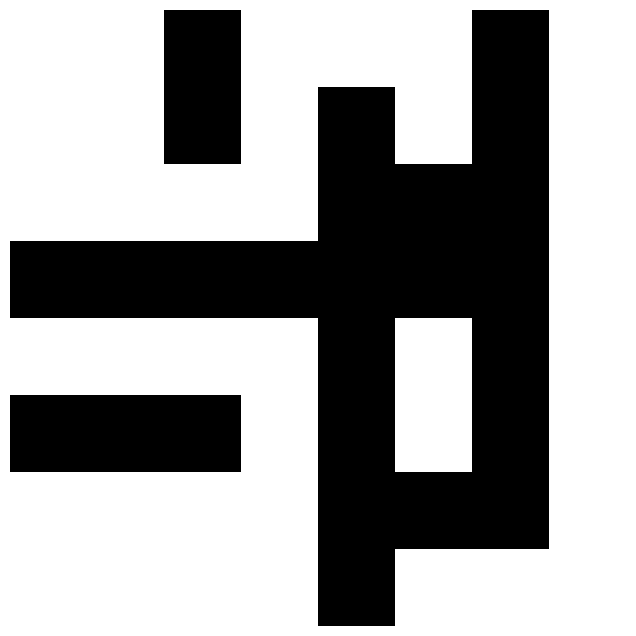

In [81]:
cvlib.imgview(img)

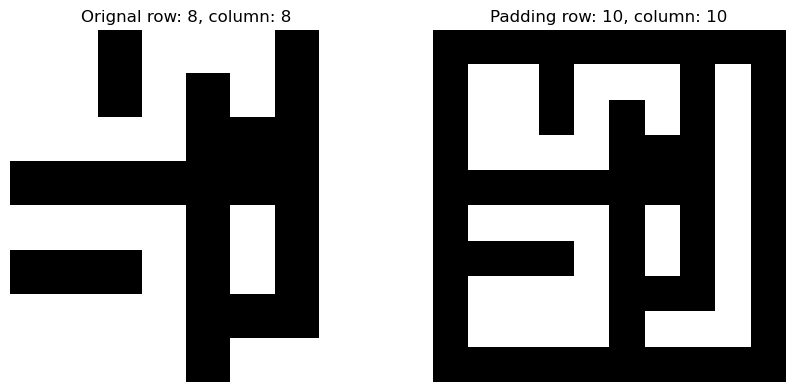

In [82]:
def imgpad(image, r):
    """_summary_
        La función empieza obteniendo el valor de columnas y filas de la imagen original. 
        Eso nos sirve, porque el padding es agregar un "marco" a la imagen, por lo que sabemos que
        r * 2 nos generara los espacios necesarios para el nuevo lenght de cada fila de la imagen. 
                                                                                    filas       columnas
        Por lo tanto, se crea un array con np.zero de numpy y sus dimensiones son: (row+(r*2), column+(r*2)
        Por ejemplo, si la imagen es de 8 * 8, tendremos una de 10 * 10, para tener 1 pixel de marco con el padding. 
        
        Para poner la imagen dentro de la matriz, le caemos encima a el espacio que equivale a donde estaría la imagen
        original. Eso nos trae justamente el espacio en donde corresponde nuestra imagen inicial. 
    Args:
        image (uint8): array de la imagen
        r (int): cantidad de pixeles que queremos nuestro padding. 
    """
    row,column = image.shape[0:2]
    arr = np.zeros((row+(r*2), column+(r*2)))
    arr[r:r+row, r:r+column] = image
    return arr

img2 = imgpad(img, 1)
r,c = img.shape[0:2]
r2,c2 = img2.shape[0:2]
cvlib.imgcmp(img, img2, title=['Orignal row: {0}, column: {1}'.format(r,c),'Padding row: {0}, column: {1}'.format(r2,c2)])

Fist_pass

In [84]:
def first_pass(img):
    current_pixel = 0
    conflictos = {}
    copy_image = img.copy()
    copy_image[copy_image>0] = 1
    copy_image = imgpad(copy_image, 1)
    row, column = copy_image.shape[0:2]
    for r in range(row):
        for c in range(column):
                if (copy_image[r,c] != 0):
                    vecinos = [copy_image[r,c-1], copy_image[r-1,c]]
                    #print(vecinos)
                    if (vecinos[0] == 0 and vecinos[1] == 0):
                        current_pixel += 1
                        copy_image[r,c] = current_pixel
                        #print(f"NO hay izquierda ni arriba, en pos: {r,c}")
                    else: 
                        if (vecinos[0] != 0 and vecinos[1] != 0):
                            if (vecinos[0] == vecinos[1]):
                                copy_image[r,c] = vecinos[0]
                            else:
                                copy_image[r,c] = min(vecinos)
                                if min(vecinos) in conflictos:
                                    if max(vecinos) in conflictos[min(vecinos)]:
                                        pass
                                    else:
                                        conflictos[min(vecinos)].append(max(vecinos))
                                else:
                                    conflictos[min(vecinos)] = [max(vecinos)]
                                # crear relacion
                        elif(vecinos[0] == 0):
                             copy_image[r,c] = vecinos[1]
                        else:
                             copy_image[r,c] = vecinos[0]
    return copy_image, conflictos

val, conflictos = first_pass(img)
print(val)
print(conflictos)
#print(imgpad(img, 1))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 2. 2. 2. 0. 3. 0.]
 [0. 1. 1. 0. 2. 0. 2. 0. 3. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 4. 4. 4. 4. 0. 5. 0. 3. 0.]
 [0. 0. 0. 0. 4. 0. 5. 0. 3. 0.]
 [0. 6. 6. 6. 4. 0. 0. 0. 3. 0.]
 [0. 6. 6. 6. 4. 0. 7. 7. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
{1.0: [2.0], 4.0: [6.0], 3.0: [7.0]}
